# Transaction Classification

This notebook uses Naive Bayes as a classifier, that is applied on to the given data set. The goal of this work is to classify the given data into different revenue categories. They are: 

Income, Private, Living, Standard of Living, Finance, Traffic, Leisure. 

(Note: Traffic class is not applicable in the given dataset)

__Technologies Used__: jupyter notebook, numpy, pandas, matplotlib, scikit-learn libraries

__Classifiers Used__: Gaussian, Multinomial, Bernoulli Naive Bayes

__Author__: Vamsi Krishna Annavarapu

## Work Flow

The following work flow was implemented:

* Reading the data: Calling the data file
* Cleaning the data: Removing the unwanted data
* Modifying the data: Count Vectorizer, Label Encoder, Replacing NaN values etc.
* Splitting the data: Test, Train split
* Processing the data: Implementing the classifier, calculation of metrics
* Displaying the results: Plotting the results

### Reading the data

Reading the data is the first step of all Data Science (DS) problems

(Note: All the libraries used in the following work are arranged at one place)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame, concat
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, hamming_loss, plot_roc_curve, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier

## Reading the data
df= pd.read_csv('SAKI Exercise 1 - Transaction Classification - Data Set.csv',sep=';')
df.head()

,Unnamed: 0,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,Waehrung,label
0,0,89990201.0,28.07.2016,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,income
1,1,89990201.0,27.07.2016,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,EUR,living
2,2,89990201.0,21.07.2016,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,EUR,private
3,3,89990201.0,20.07.2016,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,EUR,standardOfLiving
4,4,89990201.0,18.07.2016,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363,EUR,leisure


### Cleaning the data

Cleaning the unwanted data is one of the important step in dealing DS problems. This step reduces the complexity of the running of algorithm and optimizes the data selection feature. 

In [15]:
#Data cleaning 

##Changing the index of data
df['Unnamed: 0'].is_unique #checking which category is unique to differentiate the data
df = df.set_index('Unnamed: 0')
df.index.rename('index', inplace=True) #Renaming the Unnamed: 0 heading as it is not named!
df = df.rename(columns = {'fit': 'fit_feature'})
drop_data = ['Waehrung'] #dropping Waehrung doesnt affect the output of the algorithm as it is same for the entire data
df.drop(columns=drop_data, inplace=True)

df.head()

,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,label
index,,,,,,,,,,
0,89990201.0,28.07.2016,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,income
1,89990201.0,27.07.2016,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,living
2,89990201.0,21.07.2016,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,private
3,89990201.0,20.07.2016,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,standardOfLiving
4,89990201.0,18.07.2016,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363,leisure


### Cleaning the data cont...

Before the modification of the existing data, it is appropriate to check if there are any NaN values in the given data set

Number of NaN values in the given dataset :
Auftragskonto                        41
Buchungstag                           0
Valutadatum                           0
Buchungstext                          0
Verwendungszweck                      0
Beguenstigter/Zahlungspflichtiger     0
Kontonummer                           1
BLZ                                   1
Betrag                                0
label                                 0
dtype: int64


<AxesSubplot:>

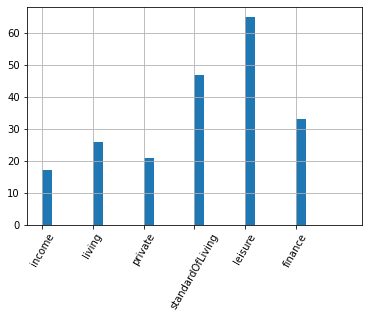

In [16]:
count_nan = df.isnull().sum()
print ('Number of NaN values in the given dataset :\n' + str(count_nan))

df['label'].hist(grid=True, bins=range(7), xrot=60, width=0.2)

### Modifying the data

This step is done to modify the existing data. Operations such as replacing NaN values with mean, median, zero's; changing the format of date to numbers; encoding the words; count vectorization of group of words;  etc. were performed on the given data.

Main operations performed:

* **Replacing NaN values with mean, median, zero's**: In this step the NaN values are to be cleared and replaced with a value corresponding to the similar datatype in the coloumn to avoid errors in the processing of data. It depends on the number of NaN values, whether to replace it with median (if there are more NaN values), zero's(if there are less Nan values).

* **Changing the format of date**: In this step the date of any format (for ex. DD.MM.YYYY, DD/MM/YYYY) should be converted to a single data type. As '.' or '/' is a part of string it should be converted to either 'float' or 'int' values. 

* **Encoding**: In this step, converting each value in a column to a number takes place. In this problem LabelEncoder is used, depending upon the data values and type of data, label encoding induces a new problem since it uses number sequencing. This is then transformed to OneHotEncoder to limit the values in between 0 and 1. This transformation is done as converting the existing numbers to 0s and 1s is easier than converting the strings as the dataset is huge.

* **Count Vectorization**: CountVectorizer is used in this work, it is similar to OneHotEncoder. CountVectorization involves counting the number of occurrences each word that appear in a sentence. This technique is accurate, counts of the word content of the text data and labels it as 0s or 1s depending on the word count. This is helpful when the addresses, text paragraphs, sentences exist.  

The whole idea of modifying the data in this work is to standardize the data in the form of **numbers** (int and float) which will be easier for the classifier to predict the output

In [17]:
df['Auftragskonto'] = df['Auftragskonto'].fillna(df['Auftragskonto'].median())

df['Buchungstag'] = pd.to_datetime(df['Buchungstag'], errors='coerce')
df['Buchungstag'] = df['Buchungstag'].apply(lambda x: x.value)

df['Valutadatum'] = pd.to_datetime(df['Valutadatum'], errors='coerce')
df['Valutadatum'] = df['Valutadatum'].apply(lambda x: x.value)

label_encoder = LabelEncoder()
buc_int_encoded = label_encoder.fit_transform(df['Buchungstext'])
buc_onehot_encoder = OneHotEncoder(sparse=False)
buc_int_encoded = buc_int_encoded.reshape(len(buc_int_encoded), 1)
buc_onehot_encoded = buc_onehot_encoder.fit_transform(buc_int_encoded)
Buchungstext = DataFrame(data=buc_onehot_encoded)

vectorizer = CountVectorizer()
ver_trans = vectorizer.fit_transform(df['Verwendungszweck'])
ver_names = vectorizer.get_feature_names()
ver_trans_array = vectorizer.transform(df['Verwendungszweck']).toarray()
Verwendungszweck = DataFrame(data=ver_trans_array, columns=ver_names)

beg_int_encoded = label_encoder.fit_transform(df['Beguenstigter/Zahlungspflichtiger'])
beg_onehot_encoder = OneHotEncoder(sparse=False)
beg_int_encoded = beg_int_encoded.reshape(len(beg_int_encoded), 1)
beg_onehot_encoded = beg_onehot_encoder.fit_transform(beg_int_encoded)
Beguenstigter = DataFrame(data=beg_onehot_encoded)

df['Kontonummer'] = df['Kontonummer'].fillna(0)

df['BLZ'] = df['BLZ'].fillna(0)

df['Betrag'] = df['Betrag'].fillna(0)

#checking the NaN once again to confirm if the above processing is performed correctly
count_nan = df.isnull().sum()
print ('Count of NaN:\n' + str(count_nan))

Count of NaN:
Auftragskonto                        0
Buchungstag                          0
Valutadatum                          0
Buchungstext                         0
Verwendungszweck                     0
Beguenstigter/Zahlungspflichtiger    0
Kontonummer                          0
BLZ                                  0
Betrag                               0
label                                0
dtype: int64


### Modifying the data cont...

The above operations performed modify the individual part of the data frame. Now it needs to be assembled into a new data frame and the further steps continue. 

Note: The data can directly be fed into test train split and later the split can be encoded. Shape errors are common and needs a lot of effort to work on them. Its better to first work on modifying the data and then split it into test train split.

In [18]:
#Redefine Dataframe

new_df = concat([pd.get_dummies(df['Auftragskonto']),pd.get_dummies(df['Buchungstag']),pd.get_dummies(df['Valutadatum'])
                 ,Buchungstext, Verwendungszweck, Beguenstigter, pd.get_dummies(df['Kontonummer']), pd.get_dummies(df['BLZ'])
                 ,pd.get_dummies(df['Betrag'])], axis=1)
new_df.shape

(209, 773)

### Splitting the data

The implementation of test-train split is to divide the data into training and target (test) part. 

Here, 
* X represents the new_df where the data is available for training; Should be 2-D array
* y represents the label part of df on which the above data is to be trained; Should be 1-D array
* test_size represent the percentage of data that needs to be given for testing from the existing dataset
* random_state ensures that the splits generated are reproducible and are deterministic in nature.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(new_df, df['label'], test_size = 0.25, random_state = 700)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 773)
(53, 773)
(156,)
(53,)


### Processing the data

**Classifier**: A classifier in machine learning is an algorithm that automatically orders or categorizes data into one or more of a set of “classes”. 

**Gaussian Naive Bayes** is useful when working with continuous values of which the probabilities can be modeled using a Gaussian distribution. The reason behind using Gaussian Naive Bayes is that the data pre-processed is converted to 0's and 1's. The algorithm will look at the height of all of the transactions and determine where the cut-off should be to maximize the model performance (usually accuracy) to classify between the given transactions.

**Metrics**: Metrics quantify and qualify the working of the classifier.

* **Accuracy score**: Computes the accuracy of the model,it is the fraction of predictions the model got right.
* **Precision score**: Quantifies the number of positive class predictions that actually belong to the positive class.
* **Recall score**: Quantifies the number of positive class predictions made out of all positive examples in a dataset.
* **F1 score**: Provides a single score that balances both the concerns of precision and recall in one number.
* **Hamming loss**: The fraction of the wrong labels to the total number of labels.
* **K-Fold Cross Validation Score**: It is a statistical method used to estimate the skill of machine learning models.

In [20]:
gaus_nb = GaussianNB()
y_pred = gaus_nb.fit(X_train, y_train).predict(X_test)

print('Metrics of GaussianNB classifier:')
print('Accuracy score:' , accuracy_score(y_test, y_pred)*100)
print('Precision score:', precision_score(y_test, y_pred, average='weighted')*100)
print('Recall score:',    recall_score(y_test, y_pred, average='weighted')*100)
print('F1 score:',        f1_score(y_test, y_pred, average='weighted')*100)
print('Hamming Loss:',    hamming_loss(y_test,y_pred)*100)
print('Mean cross Validation Score:', cross_val_score(gaus_nb, X_test, y_test, scoring='accuracy', cv=4).mean()*100)

Metrics of GaussianNB classifier:
Accuracy score: 98.11320754716981
Precision score: 98.23899371069182
Recall score: 98.11320754716981
F1 score: 98.09024455585748
Hamming Loss: 1.8867924528301887
Mean cross Validation Score: 88.73626373626374


**Multinomial Naive Bayes** calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output. It is suitable for classification with discrete features and the multinomial distribution normally requires integer feature counts. It is useful when the datasets contain huge amounts of data that needs to be segregated with the word count.

In [21]:
mul_nb = MultinomialNB()
y_pred = mul_nb.fit(X_train, y_train).predict(X_test)

print('Metrics of MultinomialNB classifier:')
print('Accuracy score:' , accuracy_score(y_test, y_pred)*100)
print('Precision score:', precision_score(y_test, y_pred, average='weighted')*100)
print('Recall score:',    recall_score(y_test, y_pred, average='weighted')*100)
print('F1 score:',        f1_score(y_test, y_pred, average='weighted')*100)
print('Hamming Loss:',    hamming_loss(y_test,y_pred)*100)
print('Mean cross Validation Score:',cross_val_score(mul_nb, X_test, y_test, scoring='accuracy', cv=4).mean()*100)

Metrics of MultinomialNB classifier:
Accuracy score: 96.22641509433963
Precision score: 96.72955974842768
Recall score: 96.22641509433963
F1 score: 96.27333330498396
Hamming Loss: 3.7735849056603774
Mean cross Validation Score: 88.73626373626374


**Bernoulli Naive Bayes** is used for discrete data and works on Bernoulli distribution, where features are only in binary form like true or false, yes or no, success or failure, 0 or 1 and so on. As the current problem is not a trivial one, this classifier doesnt fit into the context.

In [22]:
ber_nb = BernoulliNB()
y_pred = ber_nb.fit(X_train, y_train).predict(X_test)

print('Metrics of BernoulliNB classifier:')
print('Accuracy score:' , accuracy_score(y_test, y_pred)*100)
print('Precision score:', precision_score(y_test, y_pred, average='weighted')*100)
print('Recall score:',    recall_score(y_test, y_pred, average='weighted')*100)
print('F1 score:',        f1_score(y_test, y_pred, average='weighted')*100)
print('Hamming Loss:',    hamming_loss(y_test,y_pred)*100)
print('Mean cross Validation Score:',cross_val_score(ber_nb, X_test, y_test, scoring='accuracy', cv=4).mean()*100)

Metrics of BernoulliNB classifier:
Accuracy score: 88.67924528301887
Precision score: 92.0754716981132
Recall score: 88.67924528301887
F1 score: 88.78137934741707
Hamming Loss: 11.320754716981133
Mean cross Validation Score: 56.59340659340659


**Confusion Matrix** is  a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

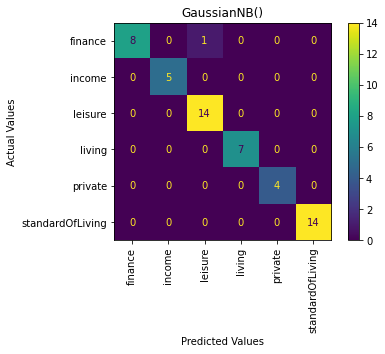

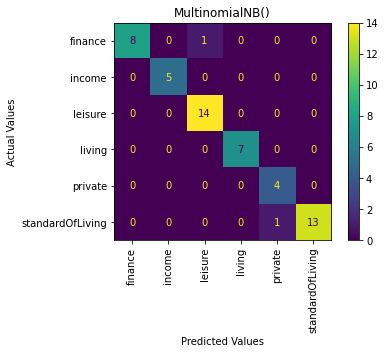

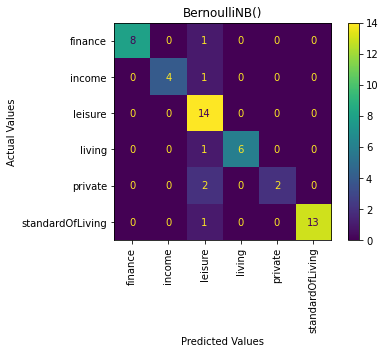

In [23]:
classifier = [gaus_nb, mul_nb, ber_nb]

for i in classifier:
    plot_confusion_matrix(i, X_test, y_test)
    plt.xticks(rotation=90)
    plt.title(i)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

**ROC and AUC score**: Area Under Curve (AUC) - Receiver Operating Characterstics (ROC) curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting '0s' as '0s' and '1s' as '1s'. 

In [24]:
X_g, y_g = make_multilabel_classification(random_state=700)
clf = GaussianNB().fit(X_train, y_train)
clf = MultiOutputClassifier(clf).fit(X_g, y_g)
# get a list of n_output containing probability arrays of shape
# (n_samples, n_classes)
y_pred_g = clf.predict_proba(X_g)
# extract the positive columns for each output
y_pred_g = np.transpose([pred[:, 1] for pred in y_pred_g])

X_m, y_m = make_multilabel_classification(random_state=700)
clf = MultinomialNB().fit(X_train, y_train)
clf = MultiOutputClassifier(clf).fit(X_m, y_m)
y_pred_m = clf.predict_proba(X_m)
y_pred_m = np.transpose([pred[:, 1] for pred in y_pred_m])

X_b, y_b = make_multilabel_classification(random_state=700)
clf = MultinomialNB().fit(X_train, y_train)
clf = MultiOutputClassifier(clf).fit(X_b, y_b)
y_pred_b = clf.predict_proba(X_b)
y_pred_b = np.transpose([pred[:, 1] for pred in y_pred_b])

g_ras = roc_auc_score(y_g, y_pred_g, multi_class='ovo')
m_ras = roc_auc_score(y_m, y_pred_m, multi_class='ovo')
b_ras = roc_auc_score(y_b, y_pred_b, multi_class='ovo')

print('roc_auc_score for GaussianNB: ', g_ras)
print('roc_auc_score for MultinomialNB: ', m_ras)
print('roc_auc_score for BernoulliNB: ', b_ras)

roc_auc_score for GaussianNB:  0.916831655703135
roc_auc_score for MultinomialNB:  0.8835882126091723
roc_auc_score for BernoulliNB:  0.8835882126091723


In [25]:
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)
y_test = y_test.ravel()
#print(y_test.shape)

y_score1 = gaus_nb.predict_proba(X_test).ravel()
y_score2 = mul_nb.predict_proba(X_test).ravel()
y_score3 = ber_nb.predict_proba(X_test).ravel()

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1,pos_label=0)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2,pos_label=1)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3,pos_label=2)

/home/vamsikrishna/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


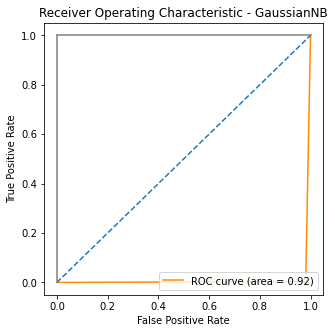

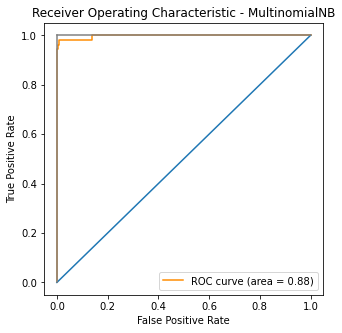

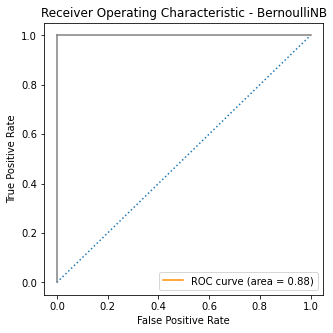

In [26]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - GaussianNB')
plt.plot(false_positive_rate1, true_positive_rate1, color='darkorange', label='ROC curve (area = %0.2f)' % g_ras)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c="0.5"), plt.plot([1, 1] , c="0.5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - MultinomialNB')
plt.plot(false_positive_rate2, true_positive_rate2, color='darkorange', label='ROC curve (area = %0.2f)' % m_ras)
plt.plot([0, 1], ls="-")
plt.plot([0, 0], [1, 0] , c="0.5"), plt.plot([1, 1] , c="0.5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - BernoulliNB')
plt.plot(false_positive_rate3, true_positive_rate3, color='darkorange', label='ROC curve (area = %0.2f)' % b_ras)
plt.plot([0, 1], ls=":")
plt.plot([0, 0], [1, 0] , c="0.5"), plt.plot([1, 1] , c="0.5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()